In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter Notebooks
%matplotlib inline

#Load the training data
train_df = pd.read_csv('train.csv')

#Quick preview
print(train_df.shape)
train_df.head()


(750000, 9)


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [2]:
#check missing values
missing_values=train_df.isnull().sum()

In [3]:
missing_values

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [6]:
#check summary stats 
summary_stats=train_df.describe()

In [7]:
summary_stats

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [8]:
#check unique values
unique_values =train_df.nunique()

In [9]:
unique_values

id            750000
Sex                2
Age               60
Height            86
Weight            91
Duration          30
Heart_Rate        63
Body_Temp         75
Calories         277
dtype: int64

In [ ]:
#lets check how is the Traget distributed "Calories" for better model desiging  

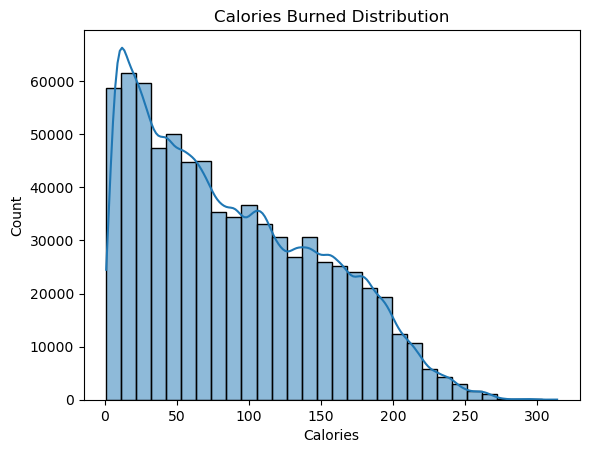

In [12]:

#distribution of colarios 
sns.histplot(train_df['Calories'], kde=True, bins=30)
plt.title('Calories Burned Distribution')
plt.xlabel('Calories')
plt.show()
#found Histogram bars stacked mostly toward the left (0–100), showing many samples with low calorie burn.

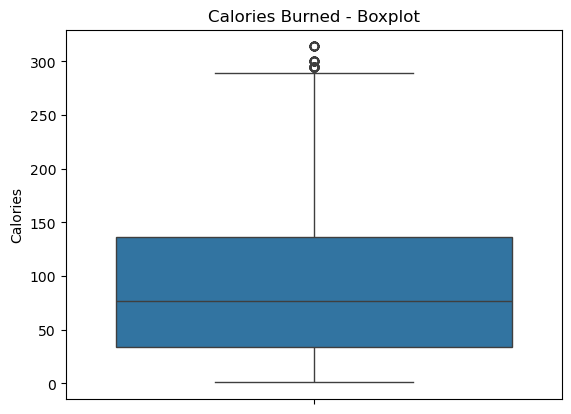

In [13]:
#check for outliers 
sns.boxplot(y=train_df['Calories'])
plt.title('Calories Burned - Boxplot')
plt.show()


In [ ]:
# Explore Input features to the Target

<Axes: xlabel='Sex', ylabel='Calories'>

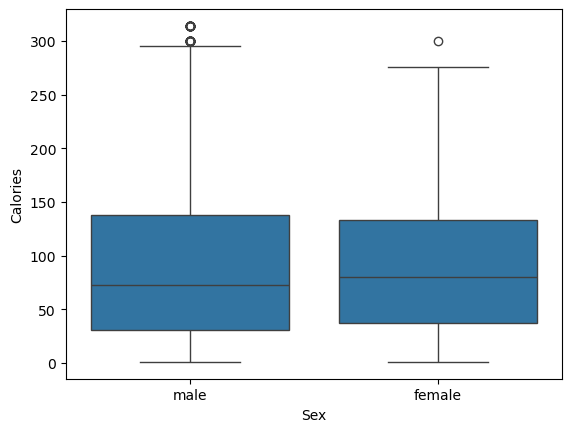

In [14]:
#sex 
sns.boxplot(x='Sex',y='Calories',data=train_df)

In [15]:
#full stats 
train_df.groupby('Sex')['Calories'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max'
)


,count,mean,median,min,max
Sex,,,,,
female,375721,87.534761,80.0,1.0,300.0
male,374279,89.033683,73.0,1.0,314.0


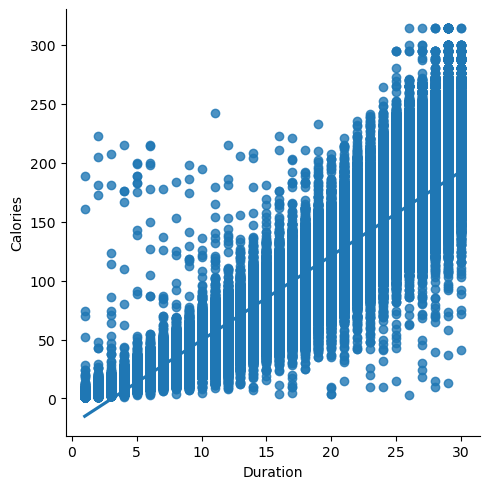

In [16]:
#Explore Duration impact to Calories "Target"
#As Duration increases, Calories burned also increases which indcates positive linear relationship: 
sns.lmplot(x='Duration', y='Calories', data=train_df)


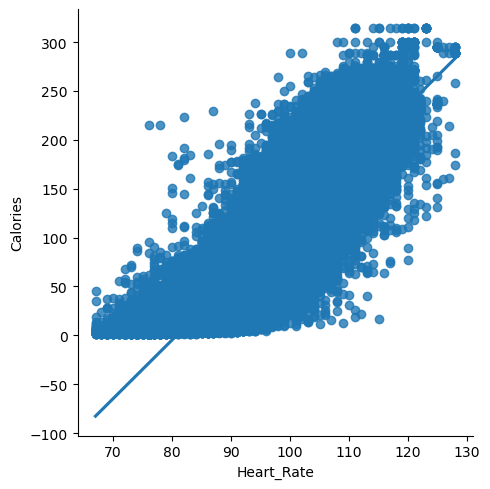

In [17]:
#Explore Heart_Rate impact to Calories "Target"
sns.lmplot(x='Heart_Rate', y='Calories', data=train_df)

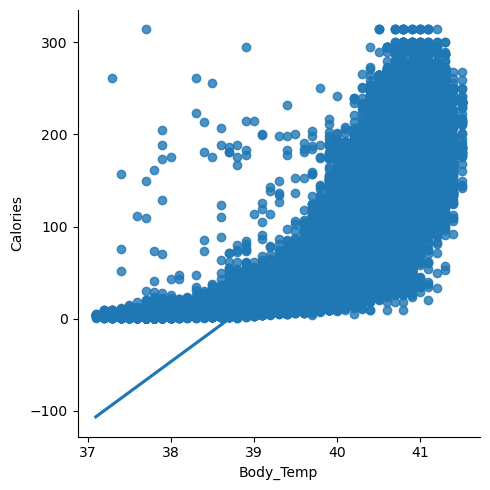

In [9]:
#Explore Heart_Rate impact to Calories "Target"
#The true relationship between Body_Temp and Calories is curved, not straight The true relationship between Body_Temp and Calories is curved, not straighte
sns.lmplot(x='Body_Temp', y='Calories', data=train_df)
plt.savefig('body_temp.jpg')what does 

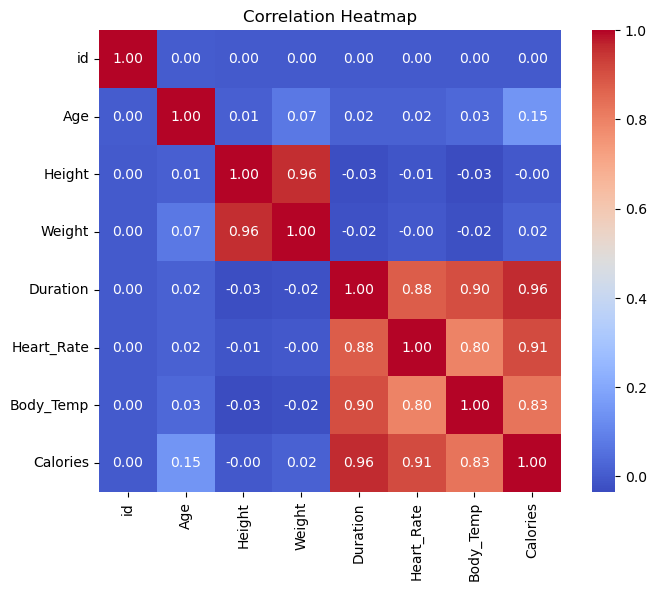

In [2]:
#check correlation between features and the target 
#Height and Weight alone aren't helpful although Age have weak positive correlation
# Compute correlation matrix
corr_matrix = train_df.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#lets Try feature Engineering lets create BMI and Workout_Load
#BMI =Weight/(Height/100)^2
#Work_load = Duration * Heart_Rate
#this veryhelpful compnation to capture nonlinear or multiplicative effect that are not capture by indviual strong feature 
#more ever someone could exerscie for 5 mins in 150 bpm and someone else could exercise 30 mins in 150 bpm they wouldnt burn the same so the comation effect is matter 
#linear model can't capure interaction unless are explicit however Tree base model does 

In [3]:
#create BMI 
train_df['BMI']=train_df['Weight']/(train_df['Height']/100)**2

In [4]:
#Creat Work_Load
train_df['Work_Load']=train_df['Heart_Rate']*train_df['Duration']

In [5]:
#Ecode the Sex to 0 for Male and 1 for Female 
train_df['Sex_encoded']=train_df['Sex'].map({'male':0,'female':1})

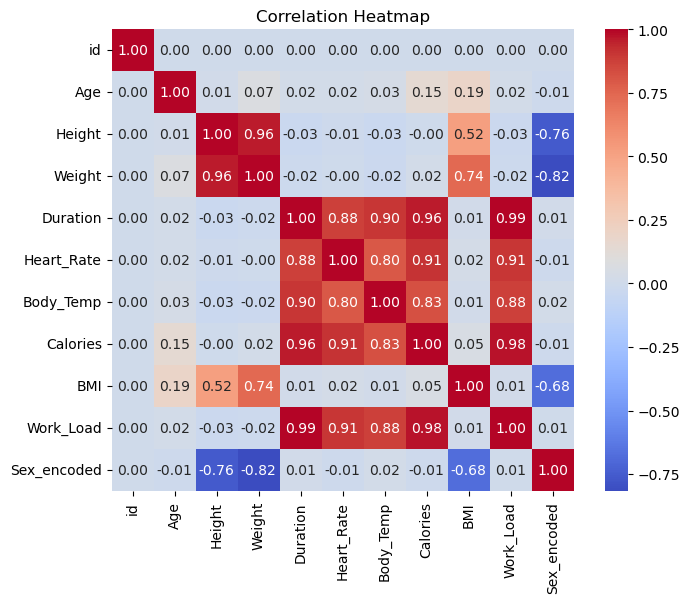

In [6]:
#check again for correaltion:
corr_matrix = train_df.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#check outliers for all numeric columns and store all values each column in dict 


In [5]:
#get numeric column only 
numeric_columns = train_df.select_dtypes(include='number').columns

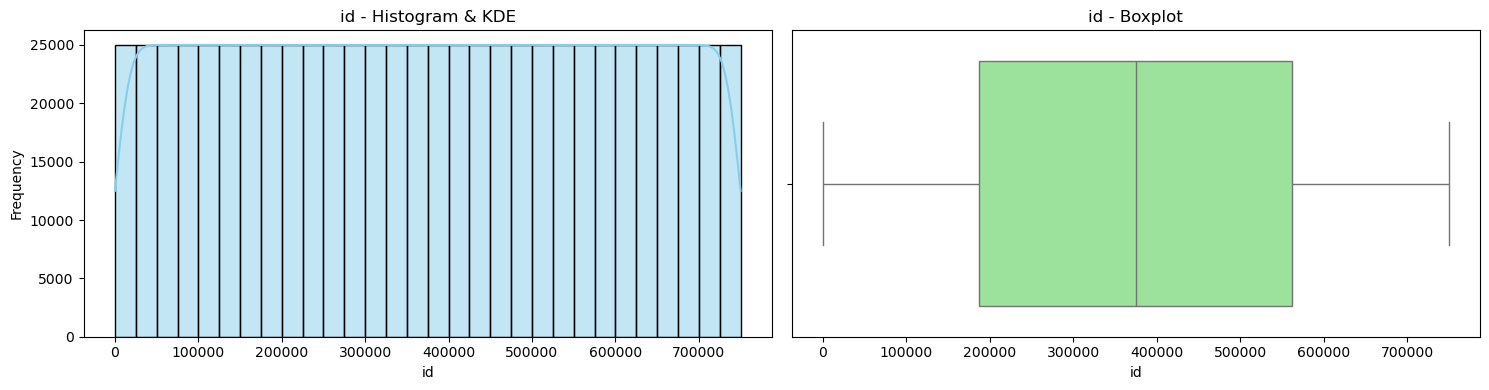

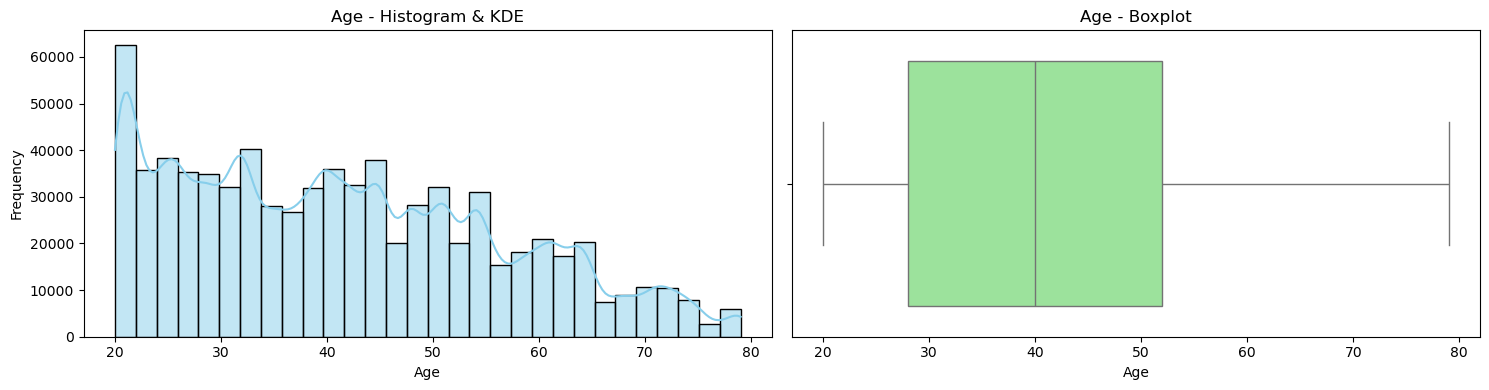

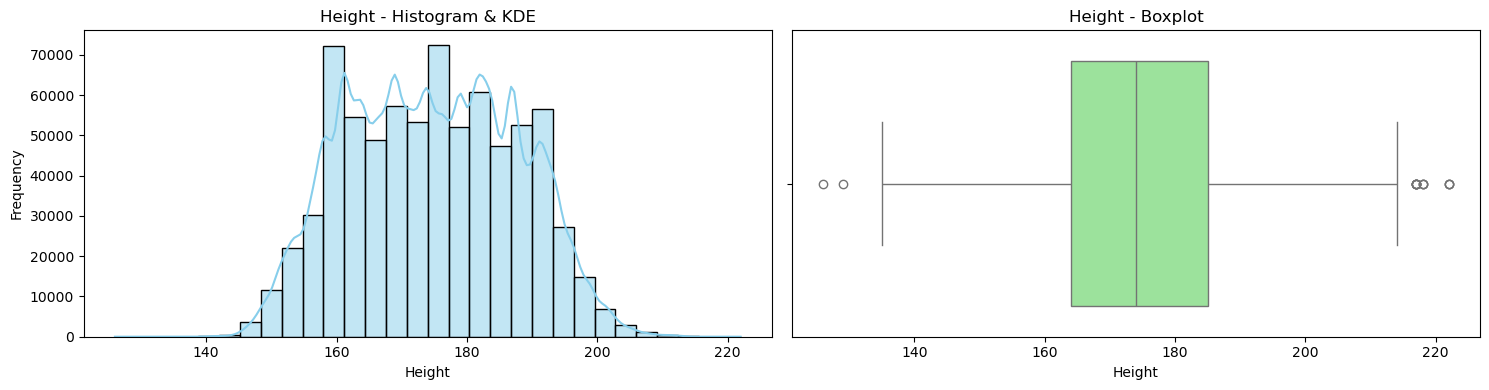

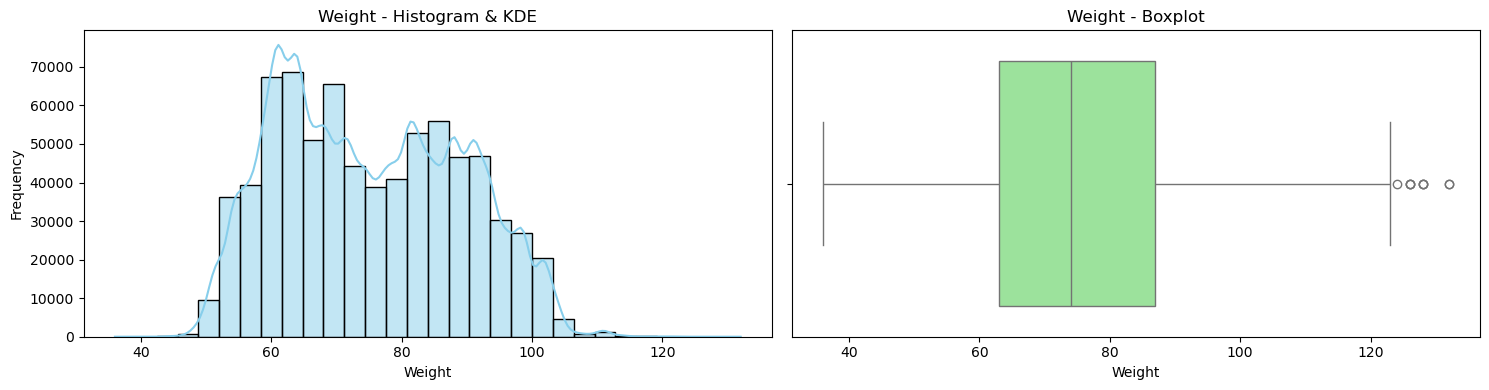

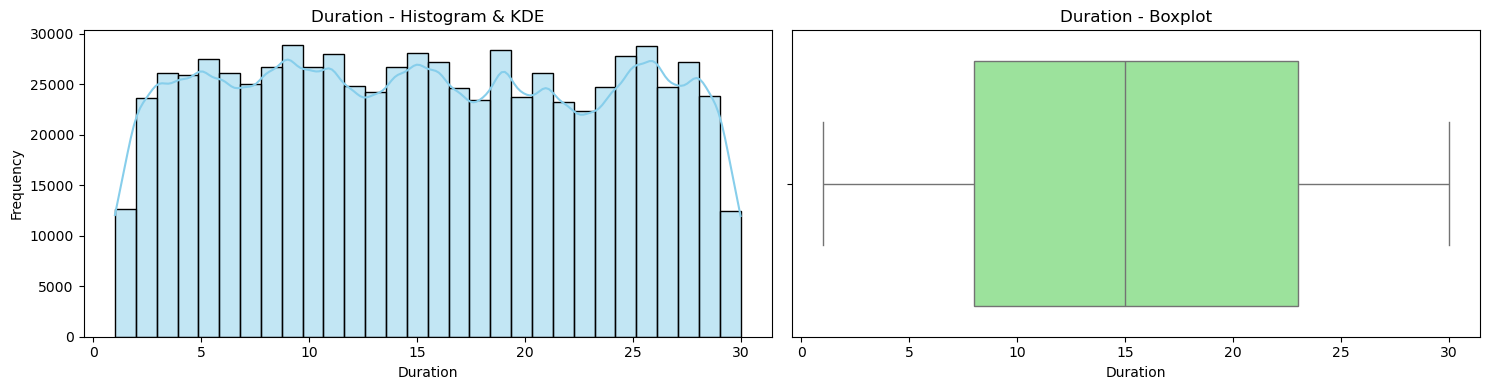

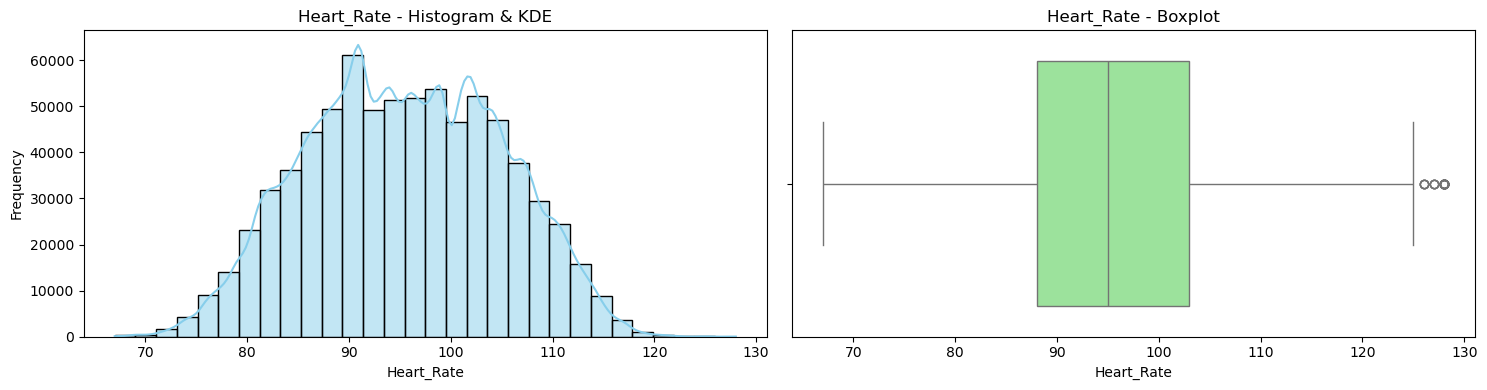

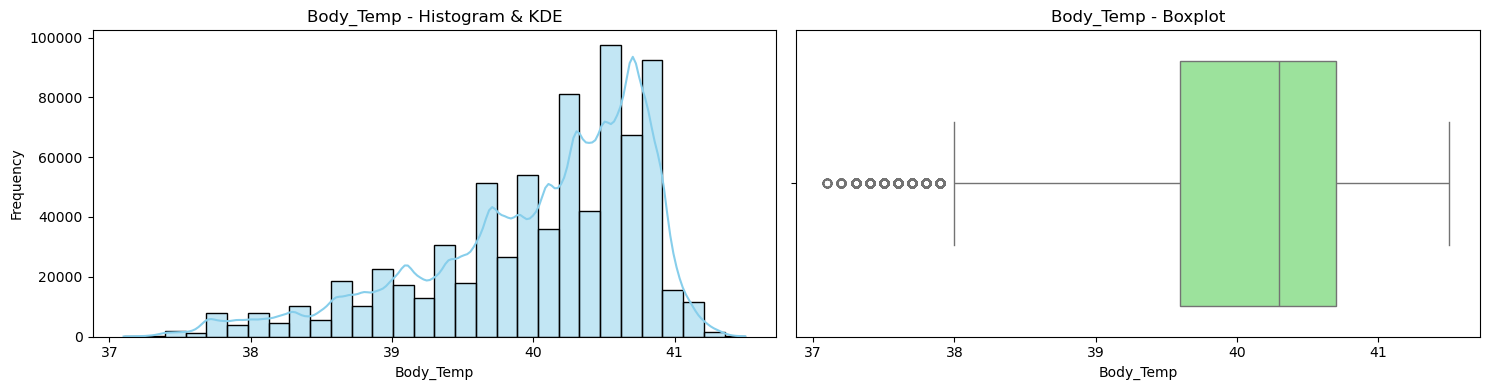

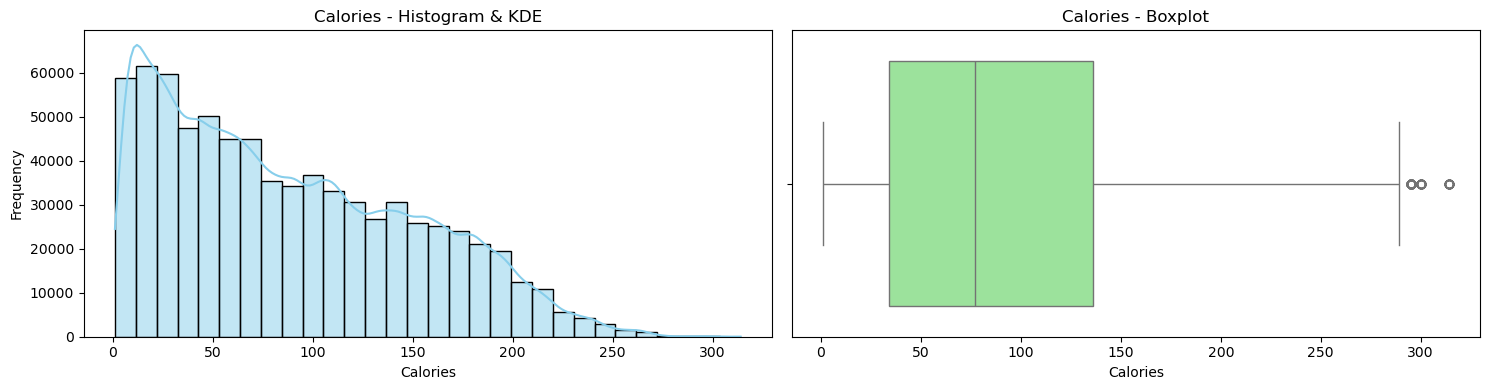

In [19]:
# Loop through each numeric column and plot
for col in numeric_columns:
    plt.figure(figsize=(15, 4))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'{col} - Histogram & KDE')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_df[col], color='lightgreen')
    plt.title(f'{col} - Boxplot')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [21]:
Q1 = train_df['Heart_Rate'].quantile(0.25)
Q3 = train_df['Heart_Rate'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Find actual outlier values
outliers = train_df[(train_df['Heart_Rate'] < lower) | (train_df['Heart_Rate'] > upper)]
print(f"Outliers count: {len(outliers)}")
print(outliers['Heart_Rate'])


Outliers count: 36
14209     127.0
21179     128.0
33592     128.0
100095    128.0
100974    128.0
113701    128.0
140361    128.0
143588    128.0
143656    128.0
161839    128.0
164475    126.0
185757    128.0
217784    128.0
222004    128.0
228760    128.0
326296    128.0
339892    128.0
361472    126.0
386474    128.0
389244    128.0
439576    128.0
461254    128.0
462736    128.0
480735    128.0
512170    128.0
514526    128.0
572466    126.0
577133    128.0
598645    128.0
599810    128.0
607350    127.0
629018    126.0
667424    127.0
676689    128.0
693306    128.0
713143    127.0
Name: Heart_Rate, dtype: float64


In [22]:
#define dict outlier_counts
outlier_counts={}

In [52]:
#IQR is rubost way to define outliers
for col in numeric_columns:
    print(f"Processing: {col}")
    Q1=train_df[col].quantile(0.25)
    Q3=train_df[col].quantile(0.75)
    IQR= Q3-Q1
    print(f"{col}: IQR = {IQR:.4f}")
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5* IQR
    #boolean mask to identify outliers
    is_outlier = ((train_df[col] < lower_bound) | (train_df[col] > upper_bound))
    #count outliers
    outlier_counts[col] = is_outlier.sum()

print("\nOutlier summary:")
print(outlier_counts)

Processing: id
id: IQR = 374999.5000
Processing: Age
Age: IQR = 24.0000
Processing: Height
Height: IQR = 21.0000
Processing: Weight
Weight: IQR = 24.0000
Processing: Duration
Duration: IQR = 15.0000
Processing: Heart_Rate
Heart_Rate: IQR = 15.0000
Processing: Body_Temp
Body_Temp: IQR = 1.1000
Processing: Calories
Calories: IQR = 102.0000

Outlier summary:
{'id': 0, 'Age': 0, 'Height': 14, 'Weight': 9, 'Duration': 0, 'Heart_Rate': 36, 'Body_Temp': 14919, 'Calories': 139}


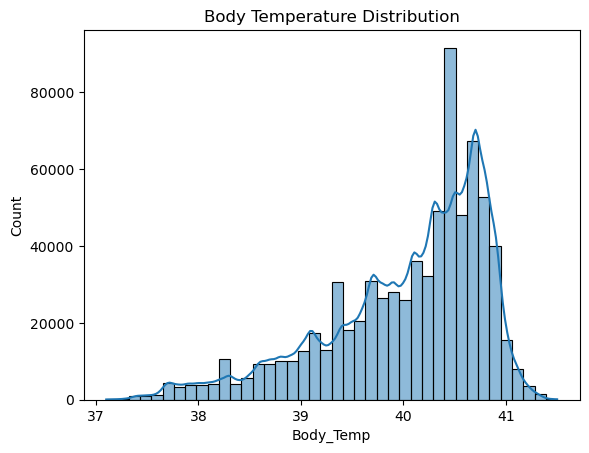

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_df['Body_Temp'], bins=40, kde=True)
plt.title('Body Temperature Distribution')
plt.xlabel('Body_Temp')
plt.savefig("body_temp.jpg")

In [42]:
print(train_df['Body_Temp'].sort_values(ascending=False).head(10))


746128    41.5
515771    41.5
639909    41.5
209574    41.5
656540    41.5
155524    41.5
408748    41.5
377250    41.5
642349    41.5
215888    41.5
Name: Body_Temp, dtype: float64


In [28]:
outlier_counts

{'id': 0,
 'Age': 0,
 'Height': 14,
 'Weight': 9,
 'Duration': 0,
 'Heart_Rate': 36,
 'Body_Temp': 14919,
 'Calories': 139}

In [41]:
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower}, Upper Bound: {upper}")

Q1: 34.0, Q3: 136.0, IQR: 102.0
Lower Bound: 65.5, Upper Bound: 125.5


In [14]:
is_outlier

0         False
1         False
2         False
3         False
4         False
          ...  
749995    False
749996    False
749997    False
749998    False
749999    False
Name: Calories, Length: 750000, dtype: bool

In [17]:
is_outlier.unique()

array([False])

In [11]:
#create dataframe for outliers with creating column Outlier_column
train_df_outlier=train_df.copy()

In [ ]:
train_df_outlier['outlier_columns']